In [1]:
# X: 샘플 집합, k: 클러스터 개수, Z: 클러스터 중심 집합, A: 샘플의 클러스터 배정 정보를 나타내는 행렬, C: 클러스터 집합

In [2]:
def calc_dist(x, z):
    if len(x) == len(z):
        n = len(x) # or len(z)
        sum = 0 
        
        for i in range(n):
            sum += (x[i]-z[i])**2
        
        dist = sum**(1/2)

        return dist

In [3]:
import random

def init_centroid(X, k): # 샘플로부터 클러스터 중심 k개를 추출하여 클러스터의 초기 중심 Z 설정, 그에 따른 A 업데이트
    Z = []
    A = [[0 for row in range(k)] for col in range(len(X))]
    indices = []
    
    for i in range(len(X)):
        idx = random.randint(0, len(X)-1)
        
        while idx in indices:
            idx = random.randint(0, len(X)-1)
            
        indices.append(idx)
    
    count = 0
    
    for i in indices:
        Z.append(X[i])
        
        if count < k:
            A[i][count] = 1
            count += 1
        
    return Z, A

In [4]:
def update_centroid(X, A, Z): # zj에 배정된 샘플 평균으로 zj를 업데이트
    for j in range(len(A[0])):
        n = 0 # n: zj에 배정된 샘플의 개수
        sum = [0] * len(X[0]) # sum: zj에 속하는 샘플의 합
        
        for i in range(len(X)):
            if A[i][j] == 1:
                for k in range(len(X[0])):
                    sum[k] += X[i][k]
                    n += 1

        if n != 0: # zj에 배정된 샘플의 개수가 0이 아닐 때
            centroid = []

            for s in sum:
                mean = s / n
                centroid.append(mean)
                
            Z[j] = centroid
                
    return Z

In [5]:
import copy
import math

def kmeans(X, k):
    Z, A = init_centroid(X, k)
    n = len(X)
    
    while True:
        prev_A = copy.deepcopy(A)
        
        for i in range(n):
            m = math.inf
            for j in range(k): # xi와 가장 가까운 클러스터 중심을 찾는다. 
                if calc_dist(X[i], Z[j]) < m:
                    m = calc_dist(X[i], Z[j])
                    A[i] = [0] * k # A i행 초기화
                    A[i][j] = 1 # A i행 업데이트
                    
        if prev_A == A: # A가 이전 루프에서의 A와 같으면
            a = [0] * k # 클러스터 개수가 k개인지 A의 열의 합으로 확인   
            
            for j in range(k):
                for i in range(n):
                    a[j] += A[i][j]
                    
            if 0 not in a: # A에 열의 합이 0인 열이 없다면 루프 종료
                break
                
        Z = update_centroid(X, A, Z)
        
    C = {}
    
    for j in range(k):
        C[j] = []
    
    for j in range(k):
        for i in range(n):
            if A[i][j] == 1:
                C[j].append(X[i])
                
    return C

In [6]:
# 실제 데이터 적용(blobs)
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np

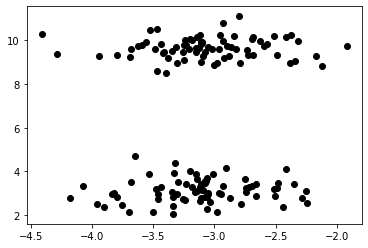

In [7]:
# k = 2일 때
X, y = make_blobs(n_samples=150, n_features=6, centers=2, cluster_std=0.5)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o')
plt.show()

In [8]:
import time

start_time = time.time()
y = kmeans(X, 2)
print("\n %.4f sec." % (time.time() - start_time))


 0.0106 sec.


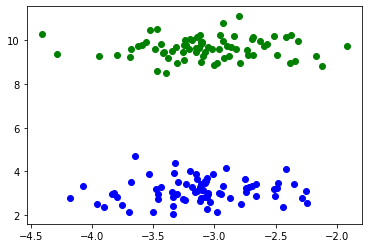

In [9]:
X_0 = np.array(y[0])
X_1 = np.array(y[1])

plt.figure()
plt.scatter(X_0[:, 0], X_0[:, 1], c='green', marker='o', label='cluster 0')
plt.scatter(X_1[:, 0], X_1[:, 1], c='blue', marker='o', label='cluster 0')
plt.show()

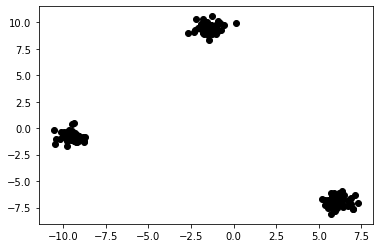

In [10]:
# k = 3일 때
X, y = make_blobs(n_samples=150, n_features=6, centers=3, cluster_std=0.5)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='black', marker='o')
plt.show()

In [11]:
start_time = time.time()
y = kmeans(X, 3)
print("\n %.4f sec." % (time.time() - start_time))


 0.0162 sec.


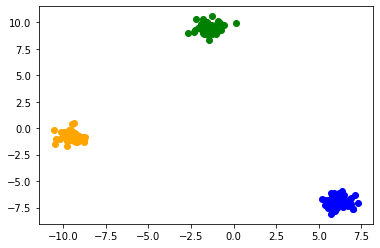

In [12]:
X_0 = np.array(y[0])
X_1 = np.array(y[1])
X_2 = np.array(y[2])

plt.figure()
plt.scatter(X_0[:, 0], X_0[:, 1], c='green', marker='o', label='cluster 0')
plt.scatter(X_1[:, 0], X_1[:, 1], c='blue', marker='o', label='cluster 0')
plt.scatter(X_2[:, 0], X_2[:, 1], c='orange', marker='o', label='cluster 0')
plt.show()